### 宿題1

### ガウスカーネルモデルに対する正則化パラメタとガウス幅の決定

In [1]:
%matplotlib inline

import numpy as np
import math
import random
import matplotlib.pyplot as plt

###### y = sin(πx)/(πx) + 0.1x の推定

In [2]:
def func(x):
    return math.sin(math.pi*x) / math.pi*x + 0.1*x

###### データの作成

In [3]:
# ノイズ入りのデータ作成
train_x = np.linspace(-3, 3, 500)
# np.random.shuffle(train_x)
train_y = np.array([func(train_x[i]) for i in range(len(train_x))] + (np.random.rand(len(train_x)) - 0.5)*0.2)
test_x = np.linspace(-3, 3, 50)
test_y = np.array([func(test_x[i]) for i in range(len(test_x))] + (np.random.rand(len(test_x)) - 0.5)*0.2)

###### モデルの定義

In [4]:
class GaussKernelModel(object):
    """ガウスカーネルモデル"""
    def __init__(self, h=0.3, _lambda=0.1):
        # hyperparameter 
        self.h = h
        self._lambda = _lambda
        self.weight = None
        self.train_x = None
    
    def fit(self, train_x, train_y):
        """cal weight of model"""
        self.train_x = train_x
        trian_y = train_y.reshape([len(train_y), 1])
        # cal K
        K =  np.zeros(len(train_x)*len(train_x)).reshape([len(train_x), len(train_x)])

        for i in range(len(train_x)):
            for j in range(len(train_x)):
                K[i, j] = self.kernel(train_x[i], train_x[j])
        
        # update weight
        self.weight = np.linalg.inv(K.dot(K) + self._lambda*np.eye(K.shape[0])).dot(K.T).dot(train_y)
        
    def kernel(self, x, c):
        """kernel function"""
        return math.exp(-1*np.power(x-c, 2).sum()) / (2*self.h**2)
    
    def predict(self, test_x):
        """
        predict funcation
        :return :predictions
        """
        if self.weight is None:
            print("You have not fitted yet.")
        predictions = []
        for i in range(len(test_x)):
            predict = 0
            for j in range(len(self.train_x)):
                predict += self.weight[j]*self.kernel(test_x[i], self.train_x[j])
            predictions.append(predict)
        return np.array(predictions)

In [5]:
# 学習
model = GaussKernelModel()
model.fit(train_x, train_y)

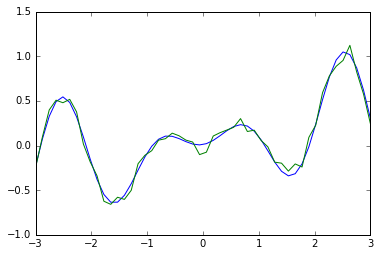

In [6]:
# 予測
y = model.predict(test_x)
plt.plot(test_x, y)
plt.plot(test_x, test_y)

###### 交差検証によるパラメタサーチ

In [8]:
from sklearn.model_selection import KFold
from sklearn import metrics
from itertools import product

hyperparameter_space = {
    "h":[0.1, 0.2, 0.3, 0.4],
    "_lambda":[0.05, 0.1, 0.15, 0.2],
}

best_score = float('inf')
best_params = None

valss = [v if isinstance(v, (tuple, list)) else (v,) for v in hyperparameter_space.values()]
for vals in product(*valss):
    params = dict(zip(hyperparameter_space.keys(), vals))
    scores = []
    # K-fold 交差検証でアルゴリズムの汎化性能を調べる
    kfold = KFold(n_splits=3)
    for train, val in kfold.split(train_x):
        model = GaussKernelModel(**params)
        model.fit(train_x[train], train_y[train])
        
        score = metrics.mean_squared_error(model.predict(train_x[val]), train_y[val])
        scores.append(score)
        
    _score  = np.mean(scores)
        
    if _score < best_score:
        best_score = _score
        best_params = params
        print(params)
        print(_score)

            
print("")
print("====================")
print("best_params:%s" % str(best_params))
print("best_score:%f" % best_score)               
print("====================")                                 

{'h': 0.1, '_lambda': 0.05}
0.212327368055
{'h': 0.2, '_lambda': 0.05}
0.209504349339
{'h': 0.2, '_lambda': 0.1}
0.205308978675
{'h': 0.2, '_lambda': 0.15}
0.202207200287
{'h': 0.2, '_lambda': 0.2}
0.199672897935
{'h': 0.3, '_lambda': 0.05}
0.197401425894
{'h': 0.3, '_lambda': 0.1}
0.190187514275
{'h': 0.3, '_lambda': 0.15}
0.186363155431
{'h': 0.3, '_lambda': 0.2}
0.184320598108
{'h': 0.4, '_lambda': 0.1}
0.182992744507

best_params:{'h': 0.4, '_lambda': 0.1}
best_score:0.182993
